#### Notebook for sub-clustering myeloid cells from *PRJCA005422* to then overlay my mregDC sig.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/PRJCA005422')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/PRJCA005422"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#Load in previously exported myeloid cells
myeloid_HGSOC_tumour <- readRDS("/scratch/user/s4436039/scdata/PRJCA005422/PRJCA005422_tumour_myeloid.RDS")
myeloid_HGSOC_ascites <- readRDS("/scratch/user/s4436039/scdata/PRJCA005422/PRJCA005422_ascites_myeloid.RDS")

In [6]:
myeloid_HGSOC_tumour
myeloid_HGSOC_ascites

An object of class Seurat 
27127 features across 13256 samples within 1 assay 
Active assay: RNA (27127 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
27127 features across 16120 samples within 1 assay 
Active assay: RNA (27127 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

#### Subclustering data

In [7]:
#Find variable features
myeloid_HGSOC_tumour <- FindVariableFeatures(myeloid_HGSOC_tumour, selection.method = "vst", nfeatures = 2000)
myeloid_HGSOC_ascites <- FindVariableFeatures(myeloid_HGSOC_ascites, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts

Finding variable features for layer counts



In [8]:
#Scale the data
myeloid_HGSOC_tumour <- ScaleData(myeloid_HGSOC_tumour, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
myeloid_HGSOC_tumour <- RunPCA(myeloid_HGSOC_tumour, features = VariableFeatures(object = myeloid_HGSOC_tumour))

#Scale the data
myeloid_HGSOC_ascites <- ScaleData(myeloid_HGSOC_ascites, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
myeloid_HGSOC_ascites <- RunPCA(myeloid_HGSOC_ascites, features = VariableFeatures(object = myeloid_HGSOC_ascites))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  TMEM176B, TMEM176A, SERPING1, C1QA, APOE, CFD, LIPA, CD14, FCGR3A, CD163 
	   C1QB, PLTP, CTSL, C1QC, C5AR1, LGMN, PLD3, CTSC, GPNMB, HLA-DQB1 
	   SMPDL3A, GLUL, FUCA1, SEPP1, FOLR2, CYP27A1, CTSB, HLA-DRB5, MARCO, APOC1 
Negative:  TYMS, STMN1, MKI67, UBE2C, RRM2, TOP2A, H2AFZ, NUSAP1, TK1, CKS1B 
	   BIRC5, CENPM, CDKN3, ZWINT, HMGN2, KIAA0101, PTMA, CENPF, HMGB2, HMGB1 
	   PTTG1, TPX2, CDK1, CENPW, DTYMK, PRC1, TMEM106C, CCNA2, TUBB, RAN 
PC_ 2 
Positive:  C1QC, C1QB, C1QA, FOS, APOE, IFI27, EGR1, GPR34, IER2, GAL3ST4 
	   SGK1, JUN, OLFML3, TREM2, CTSC, GADD45B, LGMN, ATF3, DAB2, FCGR3A 
	   MS4A6A, C3, RGS1, STAB1, TMEM176B, APOC1, MS4A4A, IGF1, FOLR2, KLF2 
Negative:  S100A10, S100A6, EREG, FCN1, TIMP1, ANPEP, AC090498.1, MIF, C15orf48, RPS10 
	   LSP1, CD52, CRIP1, RPL17, VCAN, LDHA, S100A4, LYZ, 

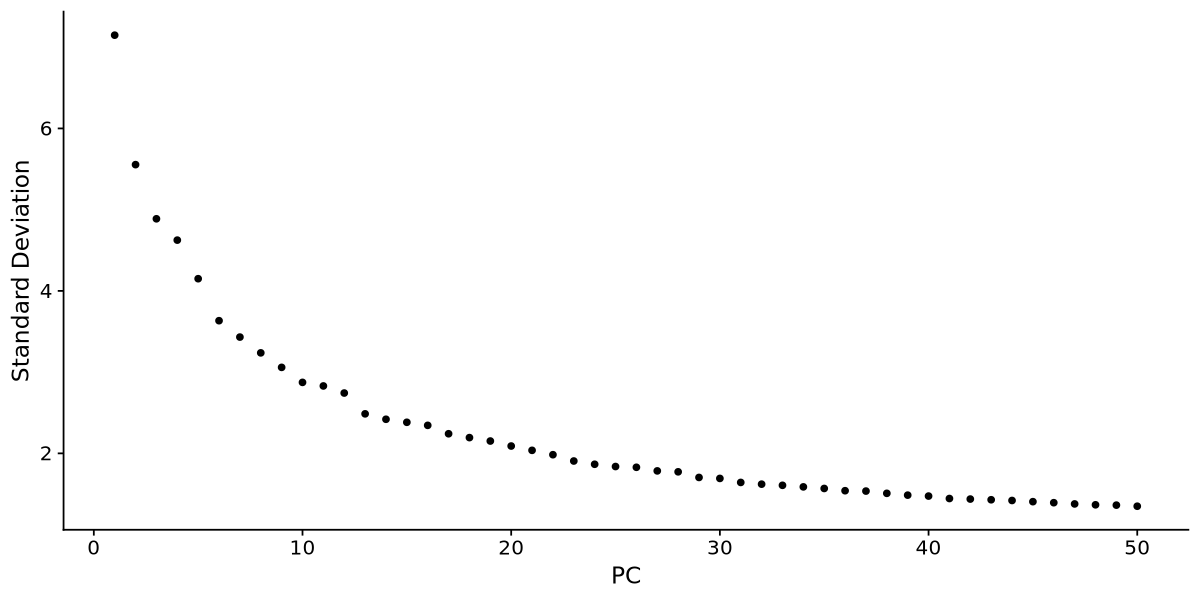

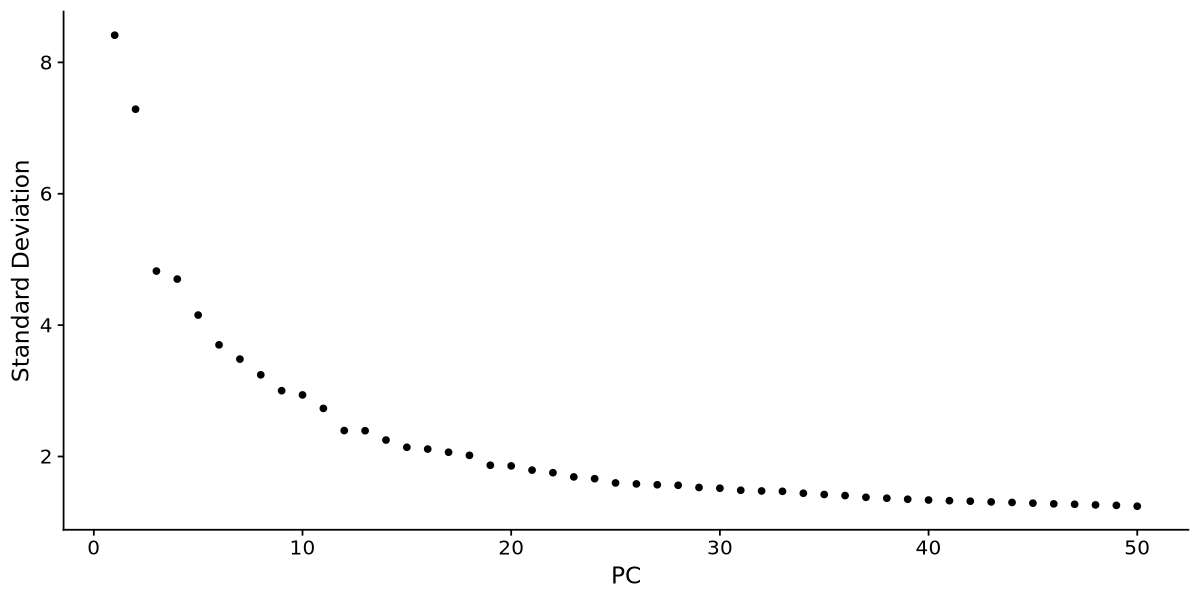

In [9]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(myeloid_HGSOC_tumour, ndims=50)
#go with 40 again

ElbowPlot(myeloid_HGSOC_ascites, ndims=50)
#go with 40 again

In [10]:
#Find neighbours (make sure number matches no. features chosen above)
myeloid_HGSOC_tumour <- FindNeighbors(myeloid_HGSOC_tumour, dims = 1:40)
myeloid_HGSOC_ascites <- FindNeighbors(myeloid_HGSOC_ascites, dims = 1:40)

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN



In [11]:
#Run UMAP
myeloid_HGSOC_tumour <- RunUMAP(myeloid_HGSOC_tumour, dims = 1:40)
myeloid_HGSOC_ascites <- RunUMAP(myeloid_HGSOC_ascites, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:56:15 UMAP embedding parameters a = 0.9922 b = 1.112

15:56:15 Read 13256 rows and found 40 numeric columns

15:56:15 Using Annoy for neighbor search, n_neighbors = 30

15:56:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:56:16 Writing NN index file to temp file /scratch/temp/9241063/RtmprowisY/file1db8c53205e6e3

15:56:16 Searching Annoy index using 1 thread, search_k = 3000

15:56:19 Annoy recall = 100%

15:56:19 Commencing smooth kNN distance calibration using 1 thread
 with 

In [39]:
#Cluster, resolution here set to 0.5
myeloid_HGSOC_tumour <- FindClusters(myeloid_HGSOC_tumour, resolution = 0.5)
myeloid_HGSOC_ascites <- FindClusters(myeloid_HGSOC_ascites, resolution = 0.3)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13256
Number of edges: 478045

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8911
Number of communities: 15
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16120
Number of edges: 593526

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9095
Number of communities: 12
Elapsed time: 2 seconds


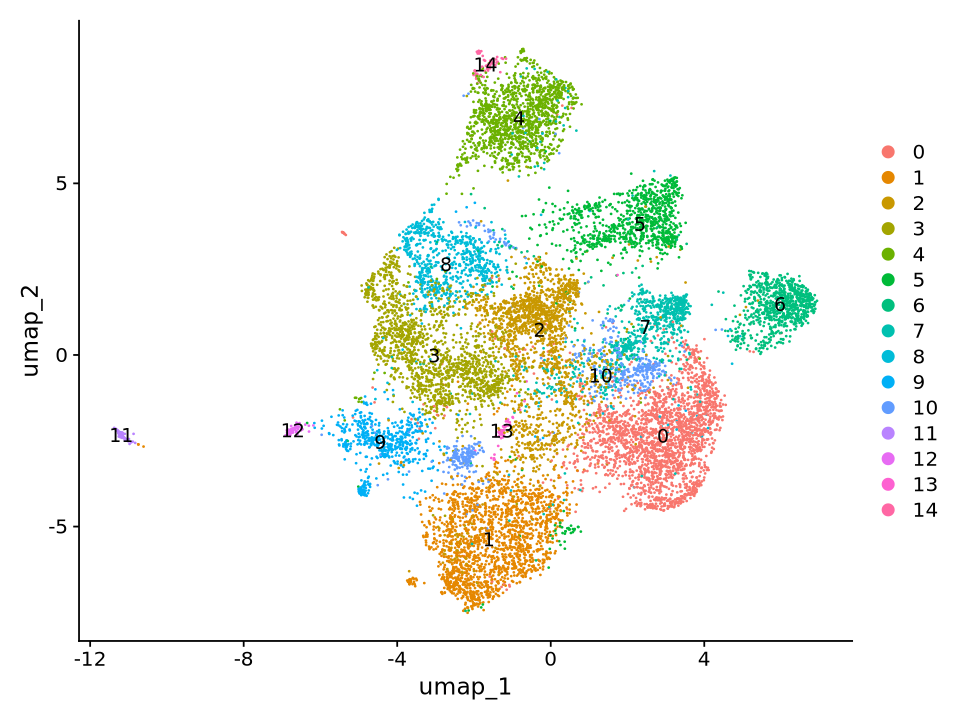

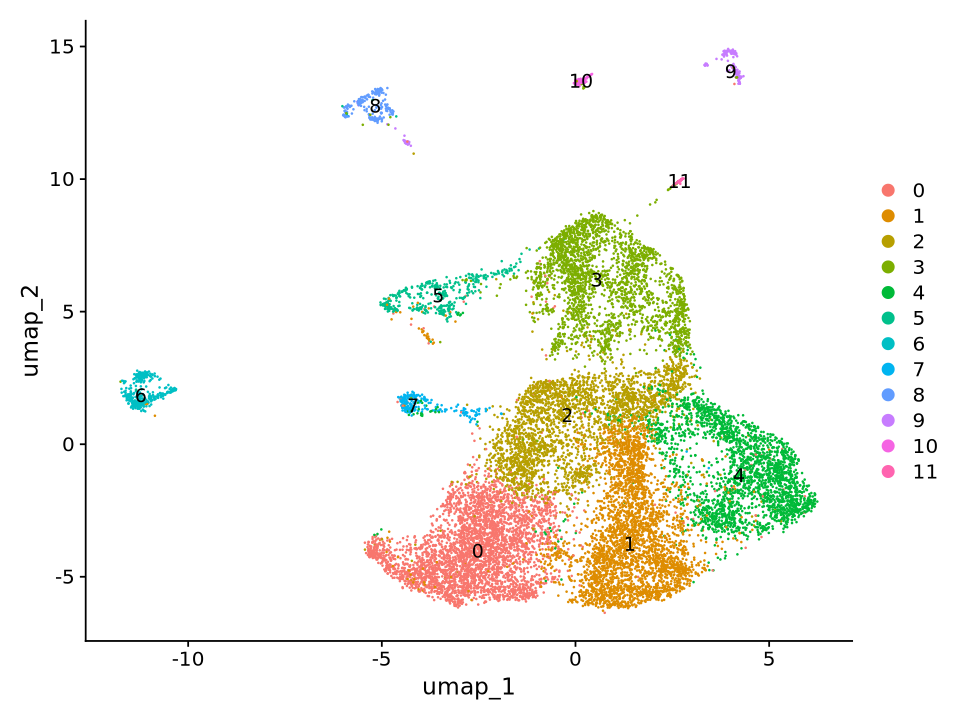

In [40]:
#Plot UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(myeloid_HGSOC_tumour, reduction = "umap", label=TRUE)
DimPlot(myeloid_HGSOC_ascites, reduction = "umap", label=TRUE)

In [41]:
#when I ran the line below it said I needed to join layers first, so doing that here.
myeloid_HGSOC_tumour <- JoinLayers(myeloid_HGSOC_tumour)
myeloid_HGSOC_ascites <- JoinLayers(myeloid_HGSOC_ascites)

In [42]:
myeloid_HGSOC_tumour
myeloid_HGSOC_ascites

An object of class Seurat 
27127 features across 13256 samples within 1 assay 
Active assay: RNA (27127 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
27127 features across 16120 samples within 1 assay 
Active assay: RNA (27127 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [43]:
library(devtools)
library(presto)

In [44]:
# find markers for every cluster compared to all remaining cells
myeloid_HGSOC_tumour.markers <- FindAllMarkers(myeloid_HGSOC_tumour, only.pos = TRUE)
myeloid_HGSOC_ascites.markers <- FindAllMarkers(myeloid_HGSOC_ascites, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



#### Focusing on tumour first

In [45]:
#report only the positive ones
myeloid_HGSOC_tumour.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene         
1      0.000000e+00 1.719808   0.895 0.517  0.000000e+00 0       CCL2         
2      0.000000e+00 1.343814   0.913 0.605  0.000000e+00 0       IFITM1       
3      0.000000e+00 1.550340   0.977 0.722  0.000000e+00 0       CCL3L3       
4      0.000000e+00 1.367383   0.944 0.697  0.000000e+00 0       IFI27        
5      0.000000e+00 1.830961   0.974 0.729  0.000000e+00 0       CCL4L2       
6      0.000000e+00 1.026729   0.991 0.867  0.000000e+00 0       HLA-DRB5     
7     4.377176e-305 2.101112   0.451 0.126 1.187397e-300 0       LAG3         
8     4.047160e-278 1.272055   0.695 0.334 1.097873e-273 0       PLA2G16      
9     2.770113e-274 2.219587   0.499 0.170 7.514486e-270 0       CCL8         
10    9.523476e-263 1.544150   0.695 0.336 2.583433e-258 0       IFIT1        
11    1.483889e-252 1.009571   0.973 0.863 4.025346e-248 0       IFI6         
12    2.614920e-241 1.061996   0.979 0.811 7.093492e-237 0       CCL4         
13    9.691523e-220 1.278922   0.636 0.306 2.629020e-215 0       MDK          
14    8.253766e-213 1.089845   0.665 0.317 2.238999e-208 0       OLFML3       
15    3.819593e-205 1.334439   0.844 0.551 1.036141e-200 0       TNF          
16    1.133996e-202 1.378607   0.773 0.477 3.076192e-198 0       CCL5         
17    2.573972e-195 1.081337   0.647 0.328 6.982415e-191 0       AXL          
18    3.232465e-183 1.083320   0.744 0.453 8.768707e-179 0       NFKBID       
19    2.139995e-180 1.173704   0.552 0.251 5.805165e-176 0       RSAD2        
20    2.799912e-176 1.472911   0.404 0.150 7.595321e-172 0       TCHH         
21    1.187333e-175 1.208263   0.720 0.437 3.220877e-171 0       PLAU         
22    6.145835e-169 1.125905   0.715 0.411 1.667181e-164 0       IFIT2        
23    4.364280e-155 1.687418   0.198 0.042 1.183898e-150 0       IFNB1        
24    2.172286e-150 1.276102   0.480 0.222 5.892759e-146 0       RGS16        
25    6.286748e-149 1.566200   0.237 0.063 1.705406e-144 0       TESC         
26    1.950848e-146 1.290882   0.417 0.175 5.292067e-142 0       CD69         
27    2.074726e-144 1.200006   0.612 0.347 5.628109e-140 0       OSM          
28    5.187027e-142 1.816352   0.247 0.071 1.407085e-137 0       LINC01268    
29    6.607241e-131 1.509417   0.373 0.155 1.792346e-126 0       IL6          
30    2.810411e-129 1.125475   0.644 0.382 7.623802e-125 0       TNFSF10      
⋮     ⋮             ⋮          ⋮     ⋮     ⋮             ⋮       ⋮            
10821 0.007283529   2.439806   0.081 0.027 1             14      SWT1         
10822 0.007318284   2.024729   0.032 0.006 1             14      FOXJ1        
10823 0.007333080   1.307812   0.548 0.461 1             14      TBXAS1       
10824 0.007371266   1.017889   0.161 0.070 1             14      SPAG4        
10825 0.007680896   2.404435   0.032 0.006 1             14      RP4-756G23.5 
10826 0.007740534   5.485620   0.016 0.002 1             14      IGKV1D-13    
10827 0.007764910   2.315052   0.145 0.066 1             14      LTB          
10828 0.007798908   1.204468   0.081 0.026 1             14      ATP2A3       
10829 0.007813591   3.754978   0.016 0.002 1             14      CLEC3B       
10830 0.007837550   3.429300   0.032 0.006 1             14      RP11-536C5.7 
10831 0.007972224   3.185285   0.016 0.002 1             14      LHX1         
10832 0.007982902   3.373774   0.016 0.002 1             14      RP11-251G23.5
10833 0.007982902   3.458708   0.016 0.002 1             14      MEIOC        
10834 0.008161555   1.357668   0.113 0.043 1             14      SLC38A1      
10835 0.008206268   2.814510   0.032 0.006 1             14      RP11-137H2.4 
10836 0.008224373   1.822874   0.177 0.086 1             14      PTGDS        
10837 0.008247262   2.506137   0.048 0.012 1             14      RP11-258F1.1 
10838 0.008365584   4.488535   0.032 0.006 1             14      KLF8         
10839 0.008545229   1.547479   0.484 0.381 1            

In [46]:
# top 20 genes for each cluster
top20cluster_tumour <- myeloid_HGSOC_tumour.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 20) %>%
    ungroup() -> top20

In [47]:
top20cluster_tumour
write.csv(top20cluster_tumour,"PRJCA005422_tumour_myeloid_top20cluster.csv") 

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene         
1    0.000000e+00 1.719808   0.895 0.517  0.000000e+00 0       CCL2         
2    0.000000e+00 1.343814   0.913 0.605  0.000000e+00 0       IFITM1       
3    0.000000e+00 1.550340   0.977 0.722  0.000000e+00 0       CCL3L3       
4    0.000000e+00 1.367383   0.944 0.697  0.000000e+00 0       IFI27        
5    0.000000e+00 1.830961   0.974 0.729  0.000000e+00 0       CCL4L2       
6    0.000000e+00 1.026729   0.991 0.867  0.000000e+00 0       HLA-DRB5     
7   4.377176e-305 2.101112   0.451 0.126 1.187397e-300 0       LAG3         
8   4.047160e-278 1.272055   0.695 0.334 1.097873e-273 0       PLA2G16      
9   2.770113e-274 2.219587   0.499 0.170 7.514486e-270 0       CCL8         
10  9.523476e-263 1.544150   0.695 0.336 2.583433e-258 0       IFIT1        
11  1.483889e-252 1.009571   0.973 0.863 4.025346e-248 0       IFI6         
12  2.614920e-241 1.061996   0.979 0.811 7.093492e-237 0       CCL4         
13  9.691523e-220 1.278922   0.636 0.306 2.629020e-215 0       MDK          
14  8.253766e-213 1.089845   0.665 0.317 2.238999e-208 0       OLFML3       
15  3.819593e-205 1.334439   0.844 0.551 1.036141e-200 0       TNF          
16  1.133996e-202 1.378607   0.773 0.477 3.076192e-198 0       CCL5         
17  2.573972e-195 1.081337   0.647 0.328 6.982415e-191 0       AXL          
18  3.232465e-183 1.083320   0.744 0.453 8.768707e-179 0       NFKBID       
19  2.139995e-180 1.173704   0.552 0.251 5.805165e-176 0       RSAD2        
20  2.799912e-176 1.472911   0.404 0.150 7.595321e-172 0       TCHH         
21   0.000000e+00 5.109678   0.787 0.078  0.000000e+00 1       TYMS         
22   0.000000e+00 5.649455   0.681 0.043  0.000000e+00 1       UBE2C        
23   0.000000e+00 5.226744   0.648 0.038  0.000000e+00 1       MKI67        
24   0.000000e+00 4.315277   0.679 0.072  0.000000e+00 1       TK1          
25   0.000000e+00 3.609366   0.762 0.166  0.000000e+00 1       CKS1B        
26   0.000000e+00 6.004105   0.618 0.028  0.000000e+00 1       RRM2         
27   0.000000e+00 4.876873   0.629 0.052  0.000000e+00 1       NUSAP1       
28   0.000000e+00 3.687293   0.938 0.362  0.000000e+00 1       STMN1        
29   0.000000e+00 5.572989   0.590 0.028  0.000000e+00 1       TOP2A        
30   0.000000e+00 3.842554   0.671 0.116  0.000000e+00 1       CDK1         
⋮   ⋮             ⋮          ⋮     ⋮     ⋮             ⋮       ⋮            
271 2.226040e-242  6.537159  0.365 0.006 6.038578e-238 13      CREG2        
272 6.325460e-233  6.517631  0.270 0.003 1.715907e-228 13      ACKR4        
273 9.179195e-230 11.036500  0.079 0.000 2.490040e-225 13      RP11-320M16.2
274 4.581411e-212  5.132451  0.667 0.025 1.242799e-207 13      MYO1B        
275 1.974196e-177  8.270718  0.937 0.067 5.355401e-173 13      CTSK         
276 2.257162e-158  5.544034  0.349 0.009 6.123002e-154 13      ITGA2        
277 1.579343e-153  7.112314  0.143 0.001 4.284283e-149 13      ESYT3        
278 4.094630e-148  6.639496  0.175 0.002 1.110750e-143 13      RFTN2        
279 8.417152e-148  4.602795  0.238 0.004 2.283321e-143 13      PKIA         
280 2.845856e-146  6.628970  0.159 0.002 7.719954e-142 13      TUBA8        
281  0.000000e+00  7.533642  0.661 0.015  0.000000e+00 14      JCHAIN       
282  0.000000e+00  8.666427  0.597 0.007  0.000000e+00 14      MZB1         
283  0.000000e+00 11.122419  0.145 0.000  0.000000e+00 14      IGLV4-60     
284 1.658888e-269  8.588317  0.210 0.001 4.500067e-265 14      IGKV3D-15    
285 3.546446e-245  8.283077  0.403 0.007 9.620445e-241 14      IGHG4        
286 5.495961e-228  9.669018  0.113 0.000 1.490889e-223 14      TNFRSF17     
287 4.871410e-219  5.515186  0.290 0.004 1.321467e-214 14      IGKV3D-11    
288 8.945354e-175 14.200612  0.194 0.002 2.426606e-170 14      IGHV2-26     
289 1.578810e-170 10.750775  0.548 0.021 4.282838e-166 14      IGHV1-69-2   
290 8.611009e-168 10.583656  0.097 0.000 2.335908e-163 14      IGHV3-64     


Warning message in DoHeatmap(myeloid_HGSOC_tumour, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: RBAKDN, RP11-702B10.2, TNNT2, ENOX1, PPY, FCRL6, GPR65, C9orf139, IFI44L, LPAR6, GIMAP4, YWHAH, HLA-DMA, DUSP1, CD44, RNASEK, RPL26, LGALS1, PLA2G16”


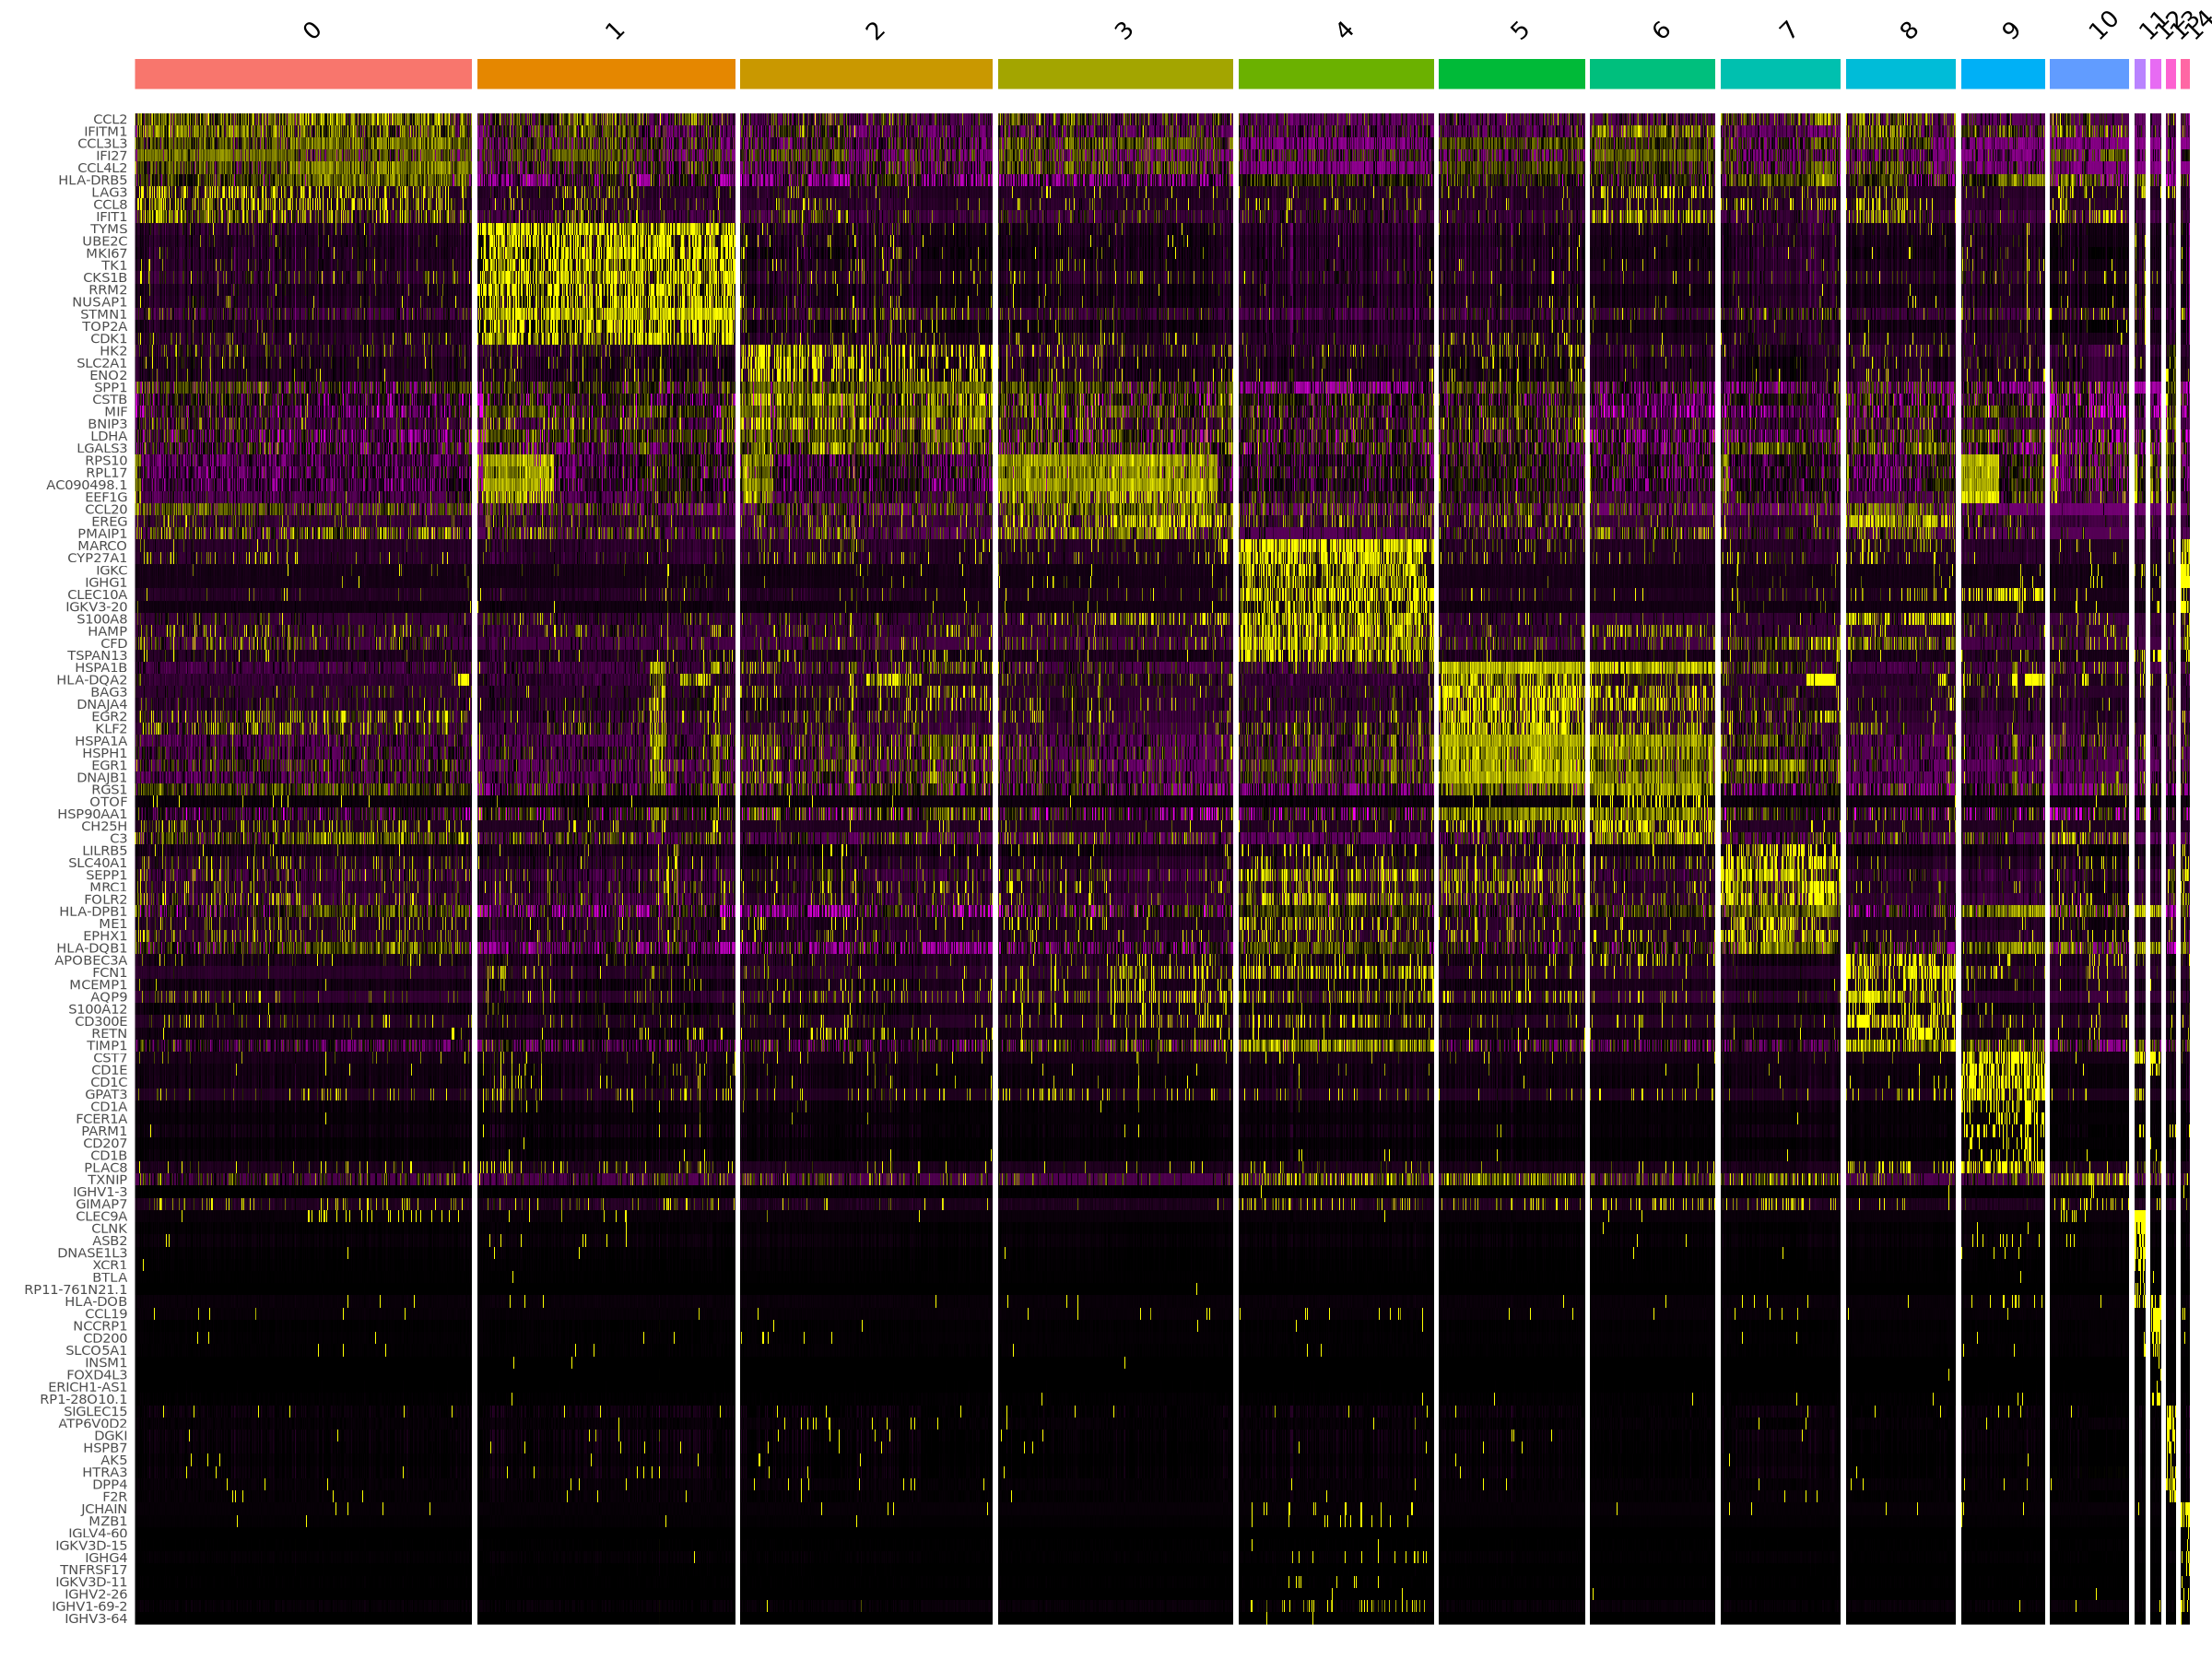

In [49]:
options(repr.plot.height=15, repr.plot.width=20)
myeloid_HGSOC_tumour.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10
DoHeatmap(myeloid_HGSOC_tumour, features = top10$gene) + NoLegend()

In [50]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(myeloid_HGSOC_tumour, file = "/scratch/user/s4436039/scdata/PRJCA005422/PRJCA005422_tumour_M_subcluster.RDS")

#### Next annotate cell clusters based on top 20 genes (done manually looking at csv exported above, see i drive for notes)

In [51]:
##add annotation code here

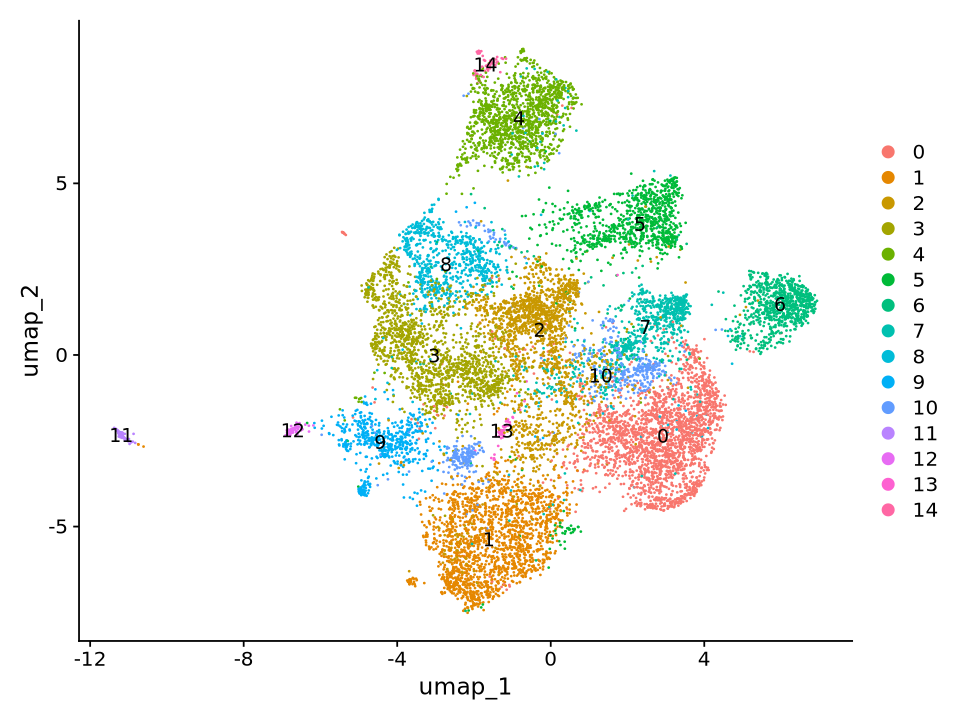

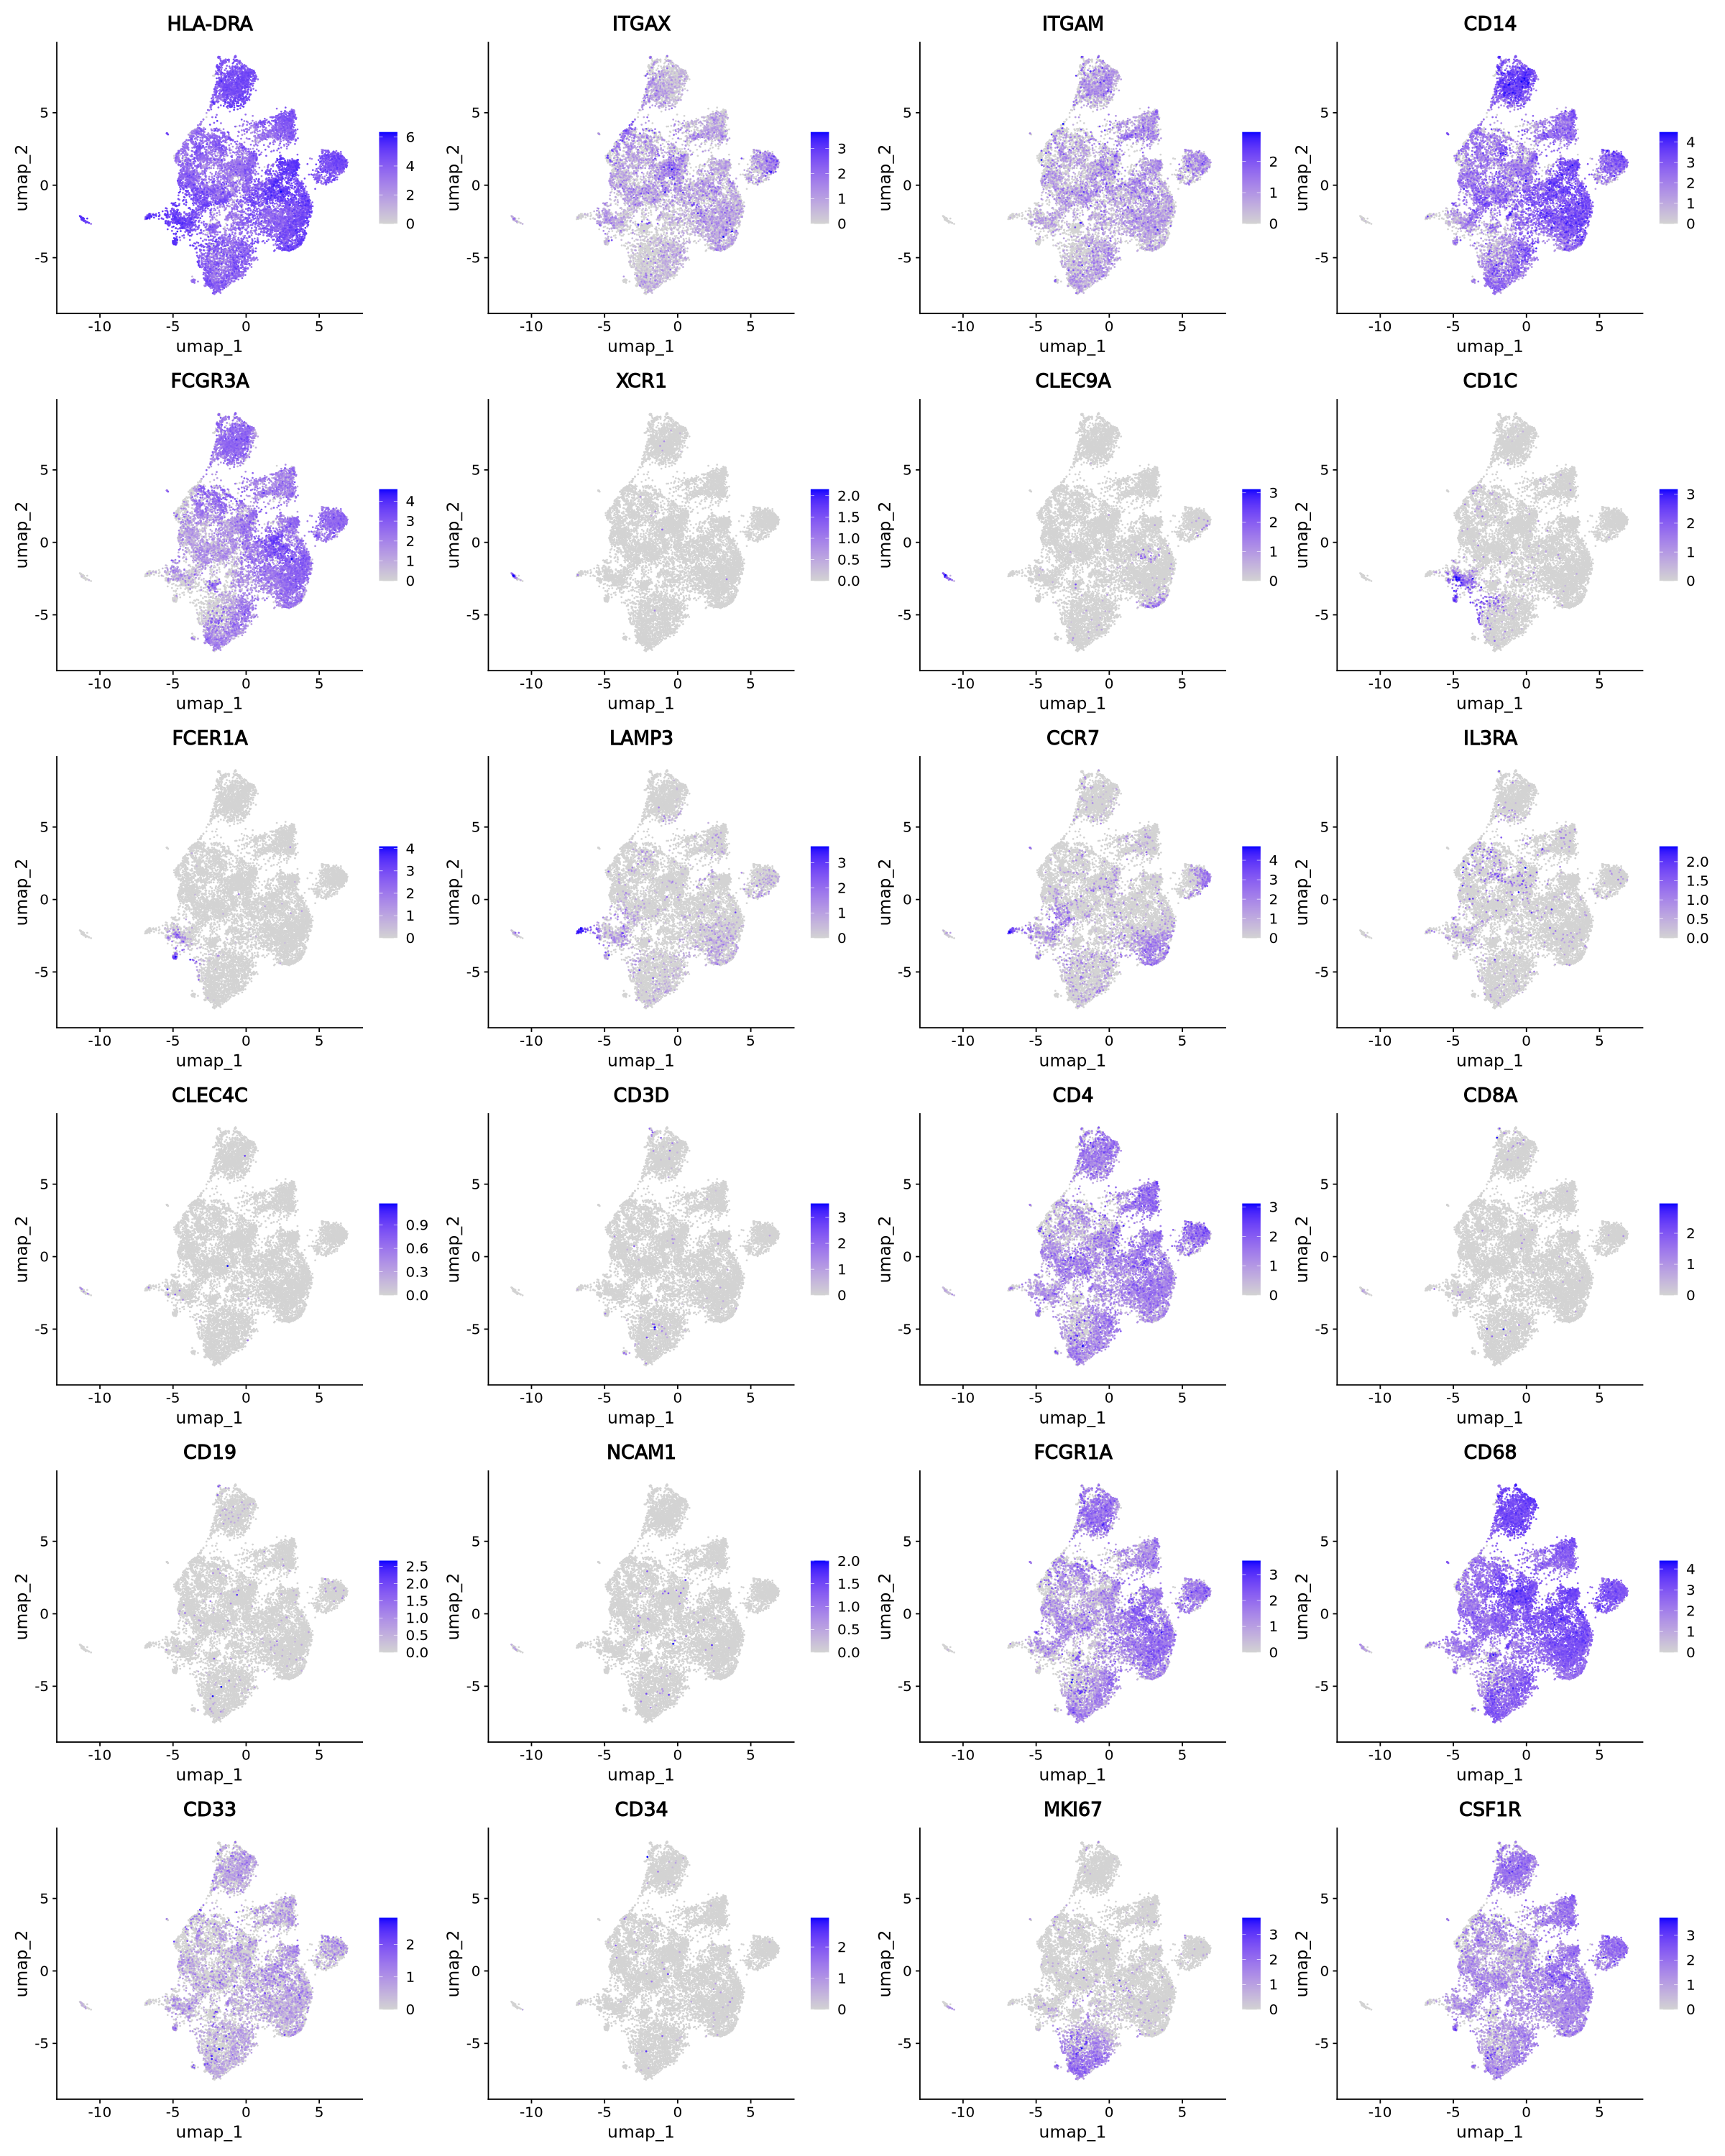

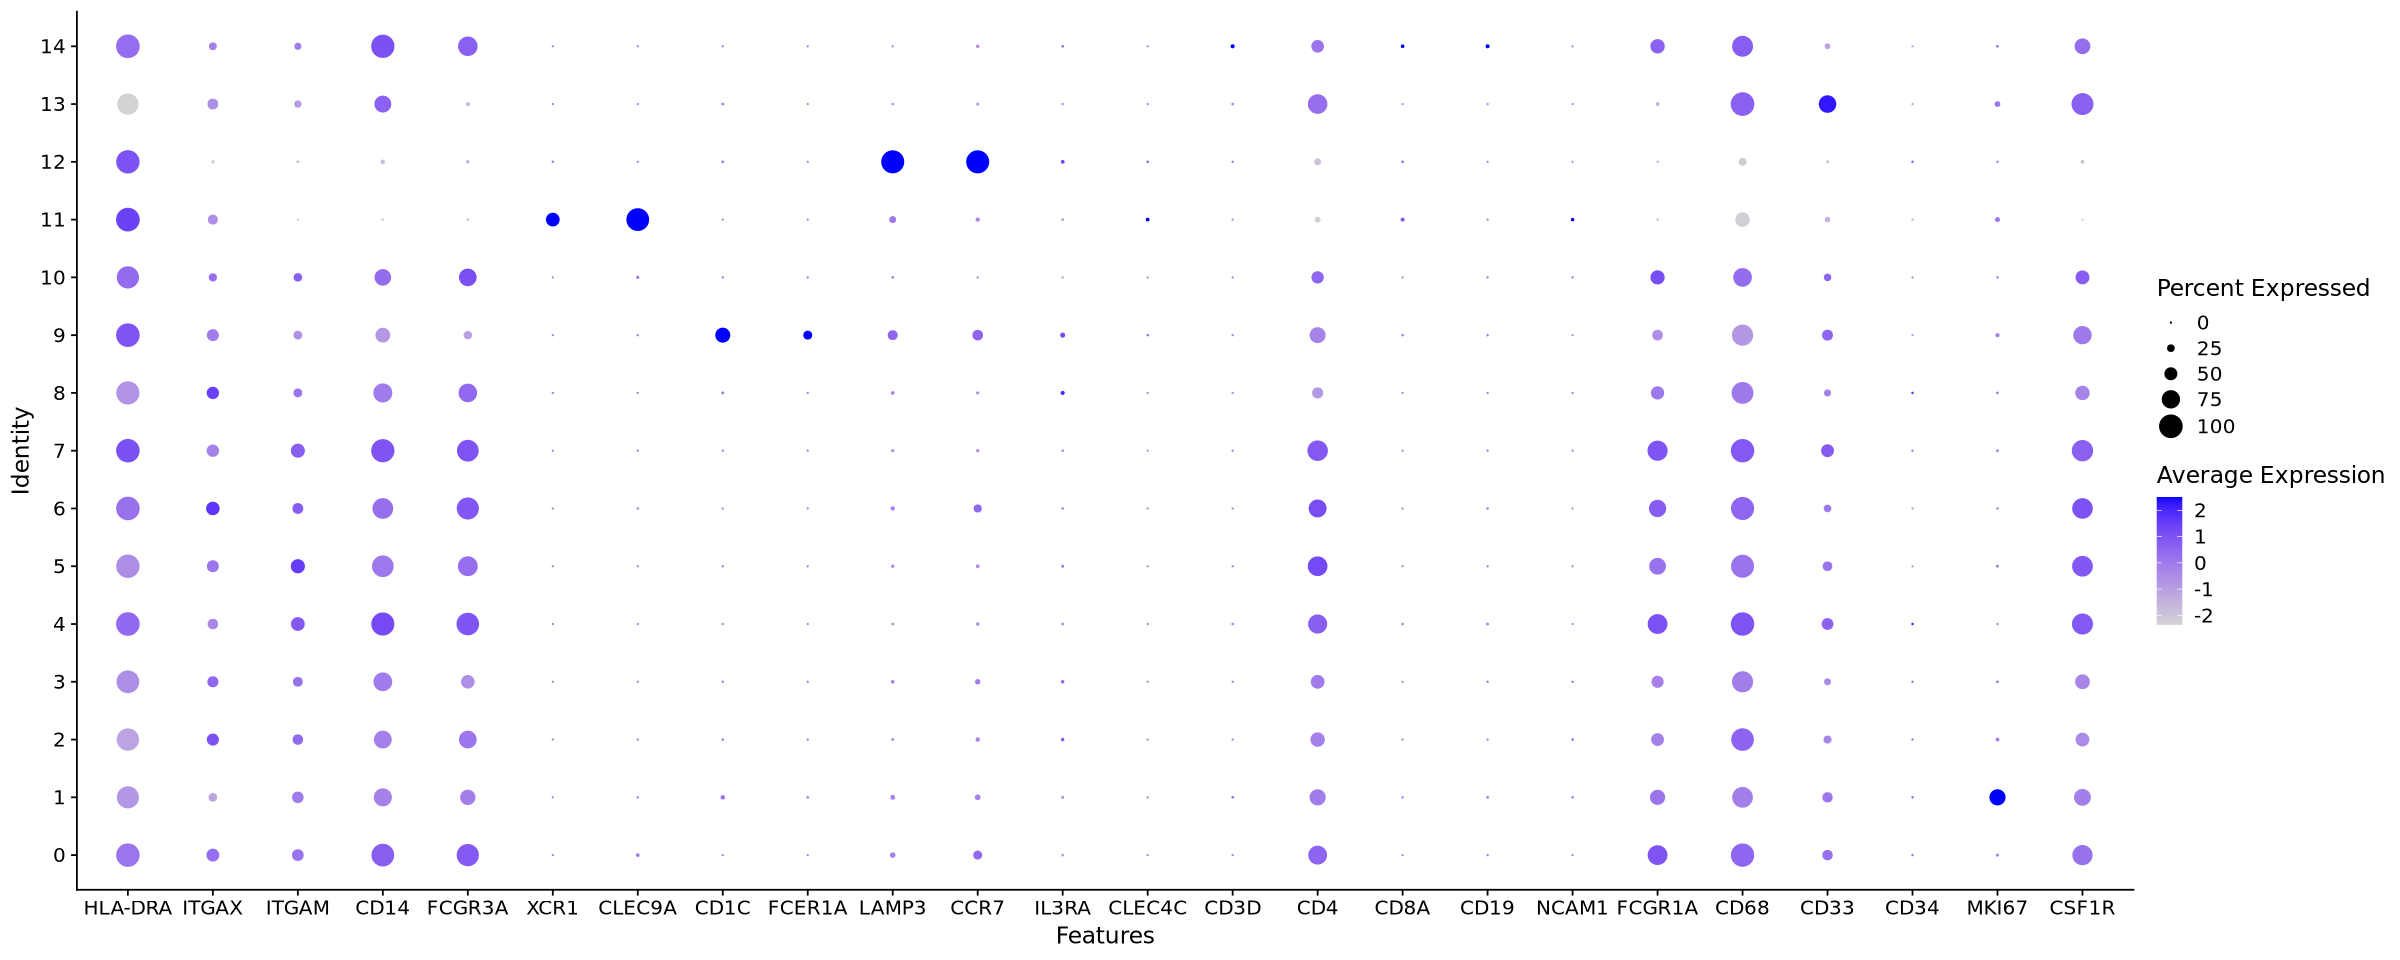

In [62]:
#annotate with a combination of canonical myeloid cell markers and the differential genes found above.
#first plotting canonical markers

#canonical genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(myeloid_HGSOC_tumour, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(myeloid_HGSOC_tumour, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67","CSF1R"), order = TRUE)

options(repr.plot.height=8, repr.plot.width=20)
DotPlot(myeloid_HGSOC_tumour, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67","CSF1R"))

#### using seurat AddModuleScore to see where my mregDC signature is enriched

In [52]:
#make an object with my top 100 DEGs (ag_pos vs Dll1 limma)

sig <- list(c(
  'CCL22',
  'IL4I1',
  'SIRPA',
  'CCR7',
  'CHST11',
  'GPR157',
  'RGS1',
  'BIRC3',
  'TRAF1',
  'CSF2RA',
  'TBC1D13',
  'LAMP3',
  'MREG',
  'PPP1R14A',
  'SPRED2',
  'CD83',
  'TXN',
  'MOB3A',
  'NFKB1',
  'TBC1D4',
  'CDK2',
  'WFDC21P',
  'ARAP2',
  'ZER1',
  'ACSL1',
  'SPINT2',
  'SQSTM1',
  'TBC1D8',
  'JAG1',
  'AC073508.3',
  'BATF',
  'ETV3',
  'BCL2',
  'KIF2A',
  'FSCN1',
  'TNFAIP3',
  'CCDC28B',
  'NR4A3',
  'CYTIP',
  'PLEK',
  'FOXO1',
  'TOMM34',
  'TRAFD1',
  'PPP1R16B',
  'CXCR4',
  'CD40',
  'ENTPD7',
  'CDKN1A',
  'BID',
  'MARCKS',
  'DUSP5',
  'MAP4K4',
  'BCL2L1',
  'ISG20',
  'RNF145',
  'RNF121',
  'GPR132',
  'RASGEF1B',
  'CYRIA',
  'RAB10',
  'CERS6',
  'IL1R1',
  'STK4',
  'CLEC2D',
  'AL390719.1',
  'ZBTB38',
  'IFNGR2',
  'CD274',
  'SLC41A2',
  'NRP2',
  'ANKRD33B',
  'GPR183',
  'POGLUT1',
  'ADORA2A',
  'JADE3',
  'KHDRBS3',
  'CTNNB1',
  'SLCO5A1',
  'NFKB2',
  'RGS2',
  'SEC61B',
  'ZNRF1',
  'RELB',
  'C12orf45',
  'IRF2',
  'EPOP',
  'MXD1',
  'RAB5B',
  'PADI2',
  'DRAM1',
  'MTMR4',
  'EEF2K',
  'GCNT2',
  'RAPH1',
  'BCL2A1',
  'SEC23B',
  'PIM3',
  'ANTXR2',
  'ABTB2',
  'TMEM200A'
))

In [53]:
#calculate module score
myeloid_HGSOC_tumour <- AddModuleScore(
  object = myeloid_HGSOC_tumour,
  features = sig,
  name = "Sig_enriched"
)

Warning message:
“The following features are not present in the object: WFDC21P, AC073508.3, CYRIA, AL390719.1, EPOP, not searching for symbol synonyms”


In [55]:
library(ggplot2)
library(RColorBrewer)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


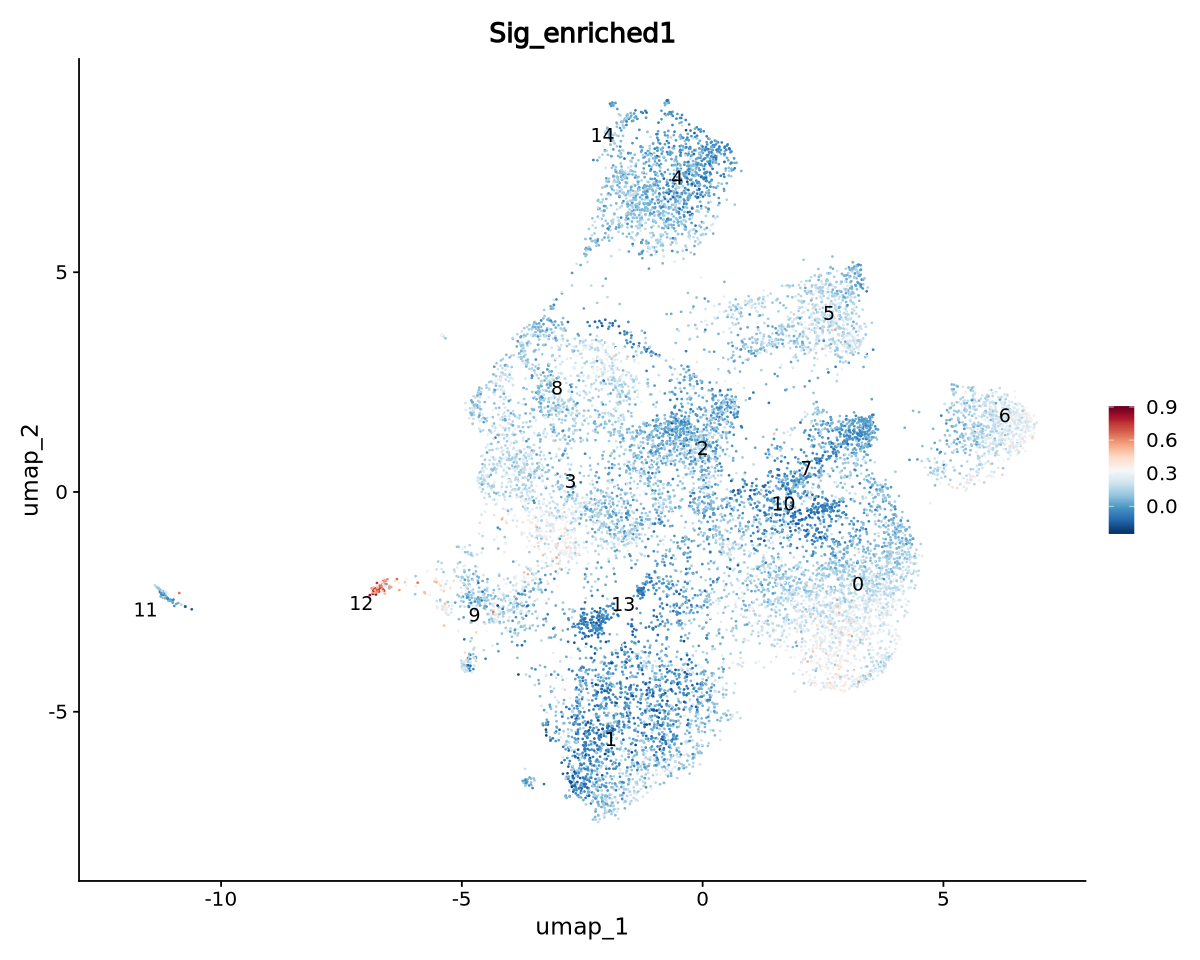

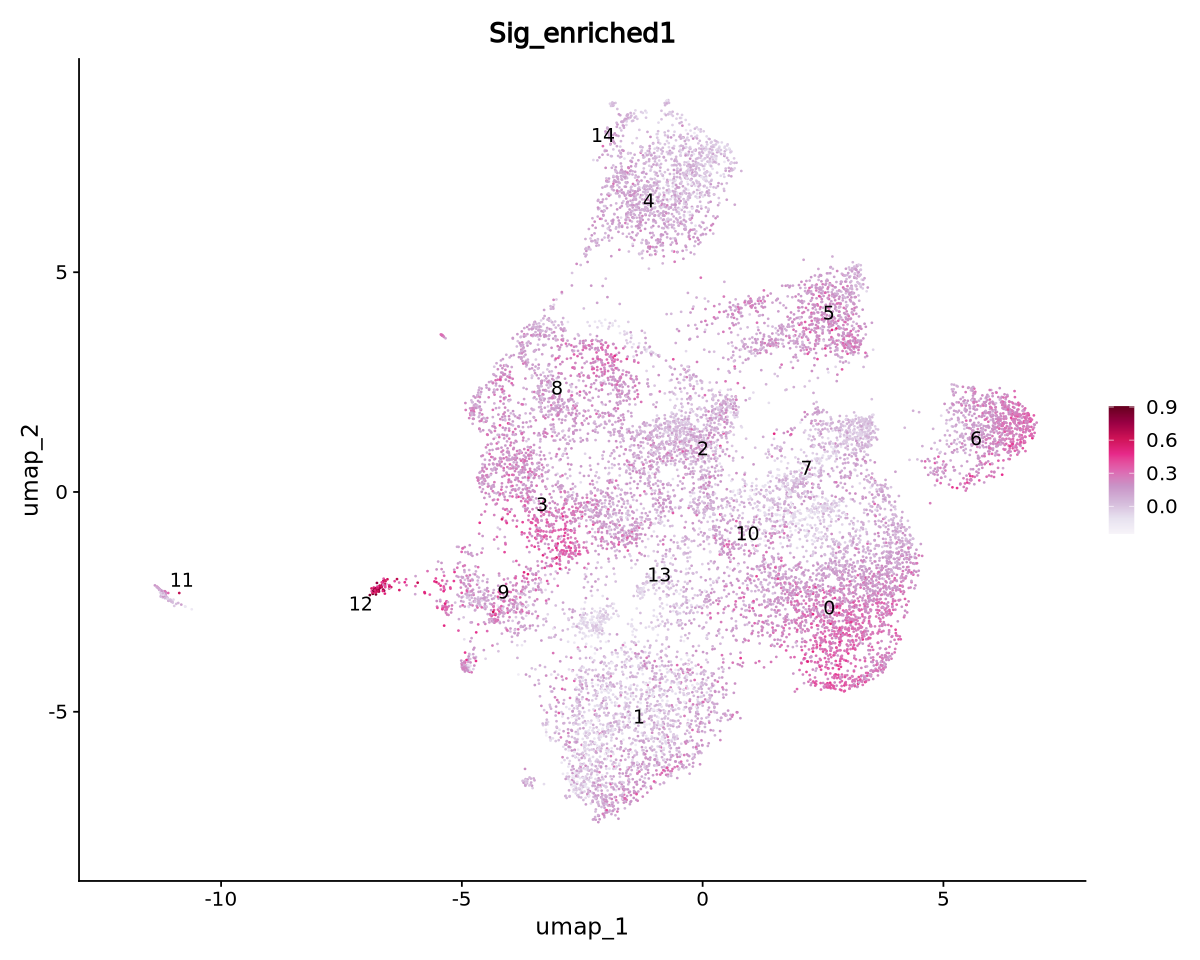

In [56]:
#Plot UMAP with module score
options(repr.plot.height=8, repr.plot.width=10)

FeaturePlot(myeloid_HGSOC_tumour,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu")))

FeaturePlot(myeloid_HGSOC_tumour,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = brewer.pal(n = 9, name = "PuRd"))

#### Now doing ascites

In [31]:
#report only the positive genes
myeloid_HGSOC_ascites.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster
1      0.000000e+00 1.158575   0.922 0.524  0.000000e+00 0      
2      0.000000e+00 3.793788   0.454 0.075  0.000000e+00 0      
3      0.000000e+00 1.675437   0.871 0.556  0.000000e+00 0      
4      0.000000e+00 1.517098   0.903 0.595  0.000000e+00 0      
5      0.000000e+00 1.158591   0.835 0.558  0.000000e+00 0      
6      0.000000e+00 1.298104   0.781 0.512  0.000000e+00 0      
7      0.000000e+00 1.523487   0.975 0.814  0.000000e+00 0      
8      0.000000e+00 1.015022   0.937 0.789  0.000000e+00 0      
9      0.000000e+00 1.069623   0.867 0.751  0.000000e+00 0      
10     0.000000e+00 1.424849   0.933 0.828  0.000000e+00 0      
11     0.000000e+00 1.156828   0.894 0.815  0.000000e+00 0      
12     0.000000e+00 1.470734   0.971 0.925  0.000000e+00 0      
13     0.000000e+00 1.066440   0.920 0.878  0.000000e+00 0      
14     0.000000e+00 1.077869   0.910 0.876  0.000000e+00 0      
15     0.000000e+00 1.744359   1.000 0.998  0.000000e+00 0      
16    2.616264e-266 1.263188   0.730 0.540 7.097140e-262 0      
17    1.890074e-263 2.899104   0.262 0.064 5.127204e-259 0      
18    5.071296e-262 1.071415   0.850 0.744 1.375691e-257 0      
19    6.796539e-237 1.090094   0.734 0.558 1.843697e-232 0      
20    1.163731e-228 2.240686   0.318 0.109 3.156854e-224 0      
21    6.214391e-210 1.642886   0.473 0.243 1.685778e-205 0      
22    8.597808e-210 1.613002   0.541 0.311 2.332327e-205 0      
23    2.297636e-203 1.643286   0.801 0.705 6.232796e-199 0      
24    2.712193e-183 1.486595   0.433 0.217 7.357366e-179 0      
25    2.251119e-175 1.221556   0.522 0.300 6.106610e-171 0      
26    1.170480e-172 1.518924   0.474 0.274 3.175160e-168 0      
27    8.695857e-166 3.581652   0.108 0.014 2.358925e-161 0      
28    2.085637e-163 1.303171   0.586 0.410 5.657706e-159 0      
29    8.587517e-153 1.524189   0.391 0.195 2.329536e-148 0      
30    2.457076e-133 2.911826   0.110 0.020 6.665310e-129 0      
⋮     ⋮             ⋮          ⋮     ⋮     ⋮             ⋮      
17578 0.008147758   3.500178   0.018 0.002 1             11     
17579 0.008156670   3.901258   0.018 0.002 1             11     
17580 0.008164107   1.724416   0.053 0.013 1             11     
17581 0.008174521   4.037413   0.018 0.002 1             11     
17582 0.008210327   3.868730   0.018 0.002 1             11     
17583 0.008222276   1.924948   0.070 0.020 1             11     
17584 0.008246274   3.751682   0.018 0.002 1             11     
17585 0.008273327   3.753082   0.018 0.002 1             11     
17586 0.008291406   3.320390   0.018 0.002 1             11     
17587 0.008309520   3.742940   0.018 0.002 1             11     
17588 0.008522120   1.570910   0.070 0.020 1             11     
17589 0.008541174   2.394979   0.035 0.007 1             11     
17590 0.008618450   1.583189   0.105 0.038 1             11     
17591 0.008657038   1.142426   0.088 0.029 1             11     
17592 0.008786091   1.229493   0.123 0.048 1             11     
17593 0.009072053   2.051644   0.070 0.021 1             11     
17594 0.009168581   1.575334   0.070 0.021 1             11     
17595 0.009192086   1.384633   0.105 0.039 1             11     
17596 0.009248829   2.175162   0.035 0.007 1             11     
17597 0.009324052   2.873889   0.035 0.007 1             11     
17598 0.009386954   1.436726   0.088 0.029 1             11     
17599 0.009418912   4.375043   0.018 0.002 1             11     
17600 0.009428902   4.426861   0.018 0.002 1             11     
17601 0.009448425   1.634672   0.070 0.021 1             11     
17602 0.009464822   1.124462   0.123 0.048 1             11     
17603 0.009531667   1.251718   0.105 0.038 1             11     
17604 0.009549524   3.148496   0.018 0.002 1             11     
17605 0.009651091   3.780096   0.018 0.002 1             11     
17606 0.009680310   1.073087   0.140 0.059 1             11     
17607 0.009703071   2.101779   0.070 0.02

In [33]:
# top 20 genes for each cluster
top20cluster_ascites <- myeloid_HGSOC_ascites.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 20) %>%
    ungroup() -> top20

In [34]:
top20cluster_ascites
write.csv(top20cluster_ascites,"PRJCA005422_ascites_myeloid_top20cluster.csv") 

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene       
1    0.000000e+00 1.158575   0.922 0.524  0.000000e+00 0       RNASE1     
2    0.000000e+00 3.793788   0.454 0.075  0.000000e+00 0       OTOA       
3    0.000000e+00 1.675437   0.871 0.556  0.000000e+00 0       CCL2       
4    0.000000e+00 1.517098   0.903 0.595  0.000000e+00 0       DAB2       
5    0.000000e+00 1.158591   0.835 0.558  0.000000e+00 0       LGMN       
6    0.000000e+00 1.298104   0.781 0.512  0.000000e+00 0       NPL        
7    0.000000e+00 1.523487   0.975 0.814  0.000000e+00 0       FABP5      
8    0.000000e+00 1.015022   0.937 0.789  0.000000e+00 0       CTSD       
9    0.000000e+00 1.069623   0.867 0.751  0.000000e+00 0       BLVRB      
10   0.000000e+00 1.424849   0.933 0.828  0.000000e+00 0       CALM3      
11   0.000000e+00 1.156828   0.894 0.815  0.000000e+00 0       ATOX1      
12   0.000000e+00 1.470734   0.971 0.925  0.000000e+00 0       CSTB       
13   0.000000e+00 1.066440   0.920 0.878  0.000000e+00 0       NOP10      
14   0.000000e+00 1.077869   0.910 0.876  0.000000e+00 0       UQCRQ      
15   0.000000e+00 1.744359   1.000 0.998  0.000000e+00 0       FTL        
16  2.616264e-266 1.263188   0.730 0.540 7.097140e-262 0       IDH1       
17  1.890074e-263 2.899104   0.262 0.064 5.127204e-259 0       CCL18      
18  5.071296e-262 1.071415   0.850 0.744 1.375691e-257 0       LGALS3     
19  6.796539e-237 1.090094   0.734 0.558 1.843697e-232 0       MPP1       
20  1.163731e-228 2.240686   0.318 0.109 3.156854e-224 0       RAB42      
21   0.000000e+00 3.069036   0.696 0.204  0.000000e+00 1       IFI27      
22   0.000000e+00 2.383296   0.748 0.310  0.000000e+00 1       PDK4       
23   0.000000e+00 1.993186   0.775 0.370  0.000000e+00 1       IFIT1      
24   0.000000e+00 1.007001   0.727 0.378  0.000000e+00 1       APOE       
25   0.000000e+00 1.769927   0.646 0.309  0.000000e+00 1       RSAD2      
26   0.000000e+00 2.008031   0.811 0.476  0.000000e+00 1       C1QC       
27   0.000000e+00 1.189802   0.820 0.485  0.000000e+00 1       SLC11A1    
28   0.000000e+00 1.523128   0.873 0.548  0.000000e+00 1       RNASE1     
29   0.000000e+00 2.167649   0.794 0.471  0.000000e+00 1       C1QB       
30   0.000000e+00 2.056815   0.804 0.482  0.000000e+00 1       C1QA       
⋮   ⋮             ⋮          ⋮     ⋮     ⋮             ⋮       ⋮          
211 0             10.466288  0.512 0.004 0             10      CCL22      
212 0              8.446398  0.500 0.003 0             10      ACHE       
213 0              9.529770  0.488 0.001 0             10      HMSD       
214 0             11.164628  0.440 0.001 0             10      RP1-28O10.1
215 0              7.818184  0.429 0.002 0             10      ANKRD33B   
216 0              6.575398  0.417 0.008 0             10      ADORA2A    
217 0              7.225915  0.393 0.005 0             10      SOCS2      
218 0              9.068411  0.369 0.001 0             10      ADAM12     
219 0             14.489923  0.357 0.000 0             10      NCCRP1     
220 0              8.896978  0.333 0.001 0             10      NGFR       
221 0              6.031866  0.947 0.028 0             11      IDO1       
222 0             10.508202  0.860 0.003 0             11      ACY3       
223 0             12.205129  0.825 0.000 0             11      PRDM16     
224 0              5.184577  0.789 0.022 0             11      LAMP3      
225 0             10.329863  0.737 0.000 0             11      PIGR       
226 0              6.610472  0.719 0.012 0             11      SYT2       
227 0              8.957595  0.684 0.001 0             11      RORC       
228 0              6.118209  0.667 0.015 0             11      GEM        
229 0              9.028972  0.614 0.002 0             11      SFTPD      
230 0              6.051331  0.614 0.013 0             11      FHL1       
231 0              5.721777  0.579 0.009 0             11      HOPX       
232 0             10.334455  

Warning message in DoHeatmap(myeloid_HGSOC_ascites, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: FHL1, AQP9, S100A6, S100A4, SLC11A1, CALM3, BLVRB, NPL”


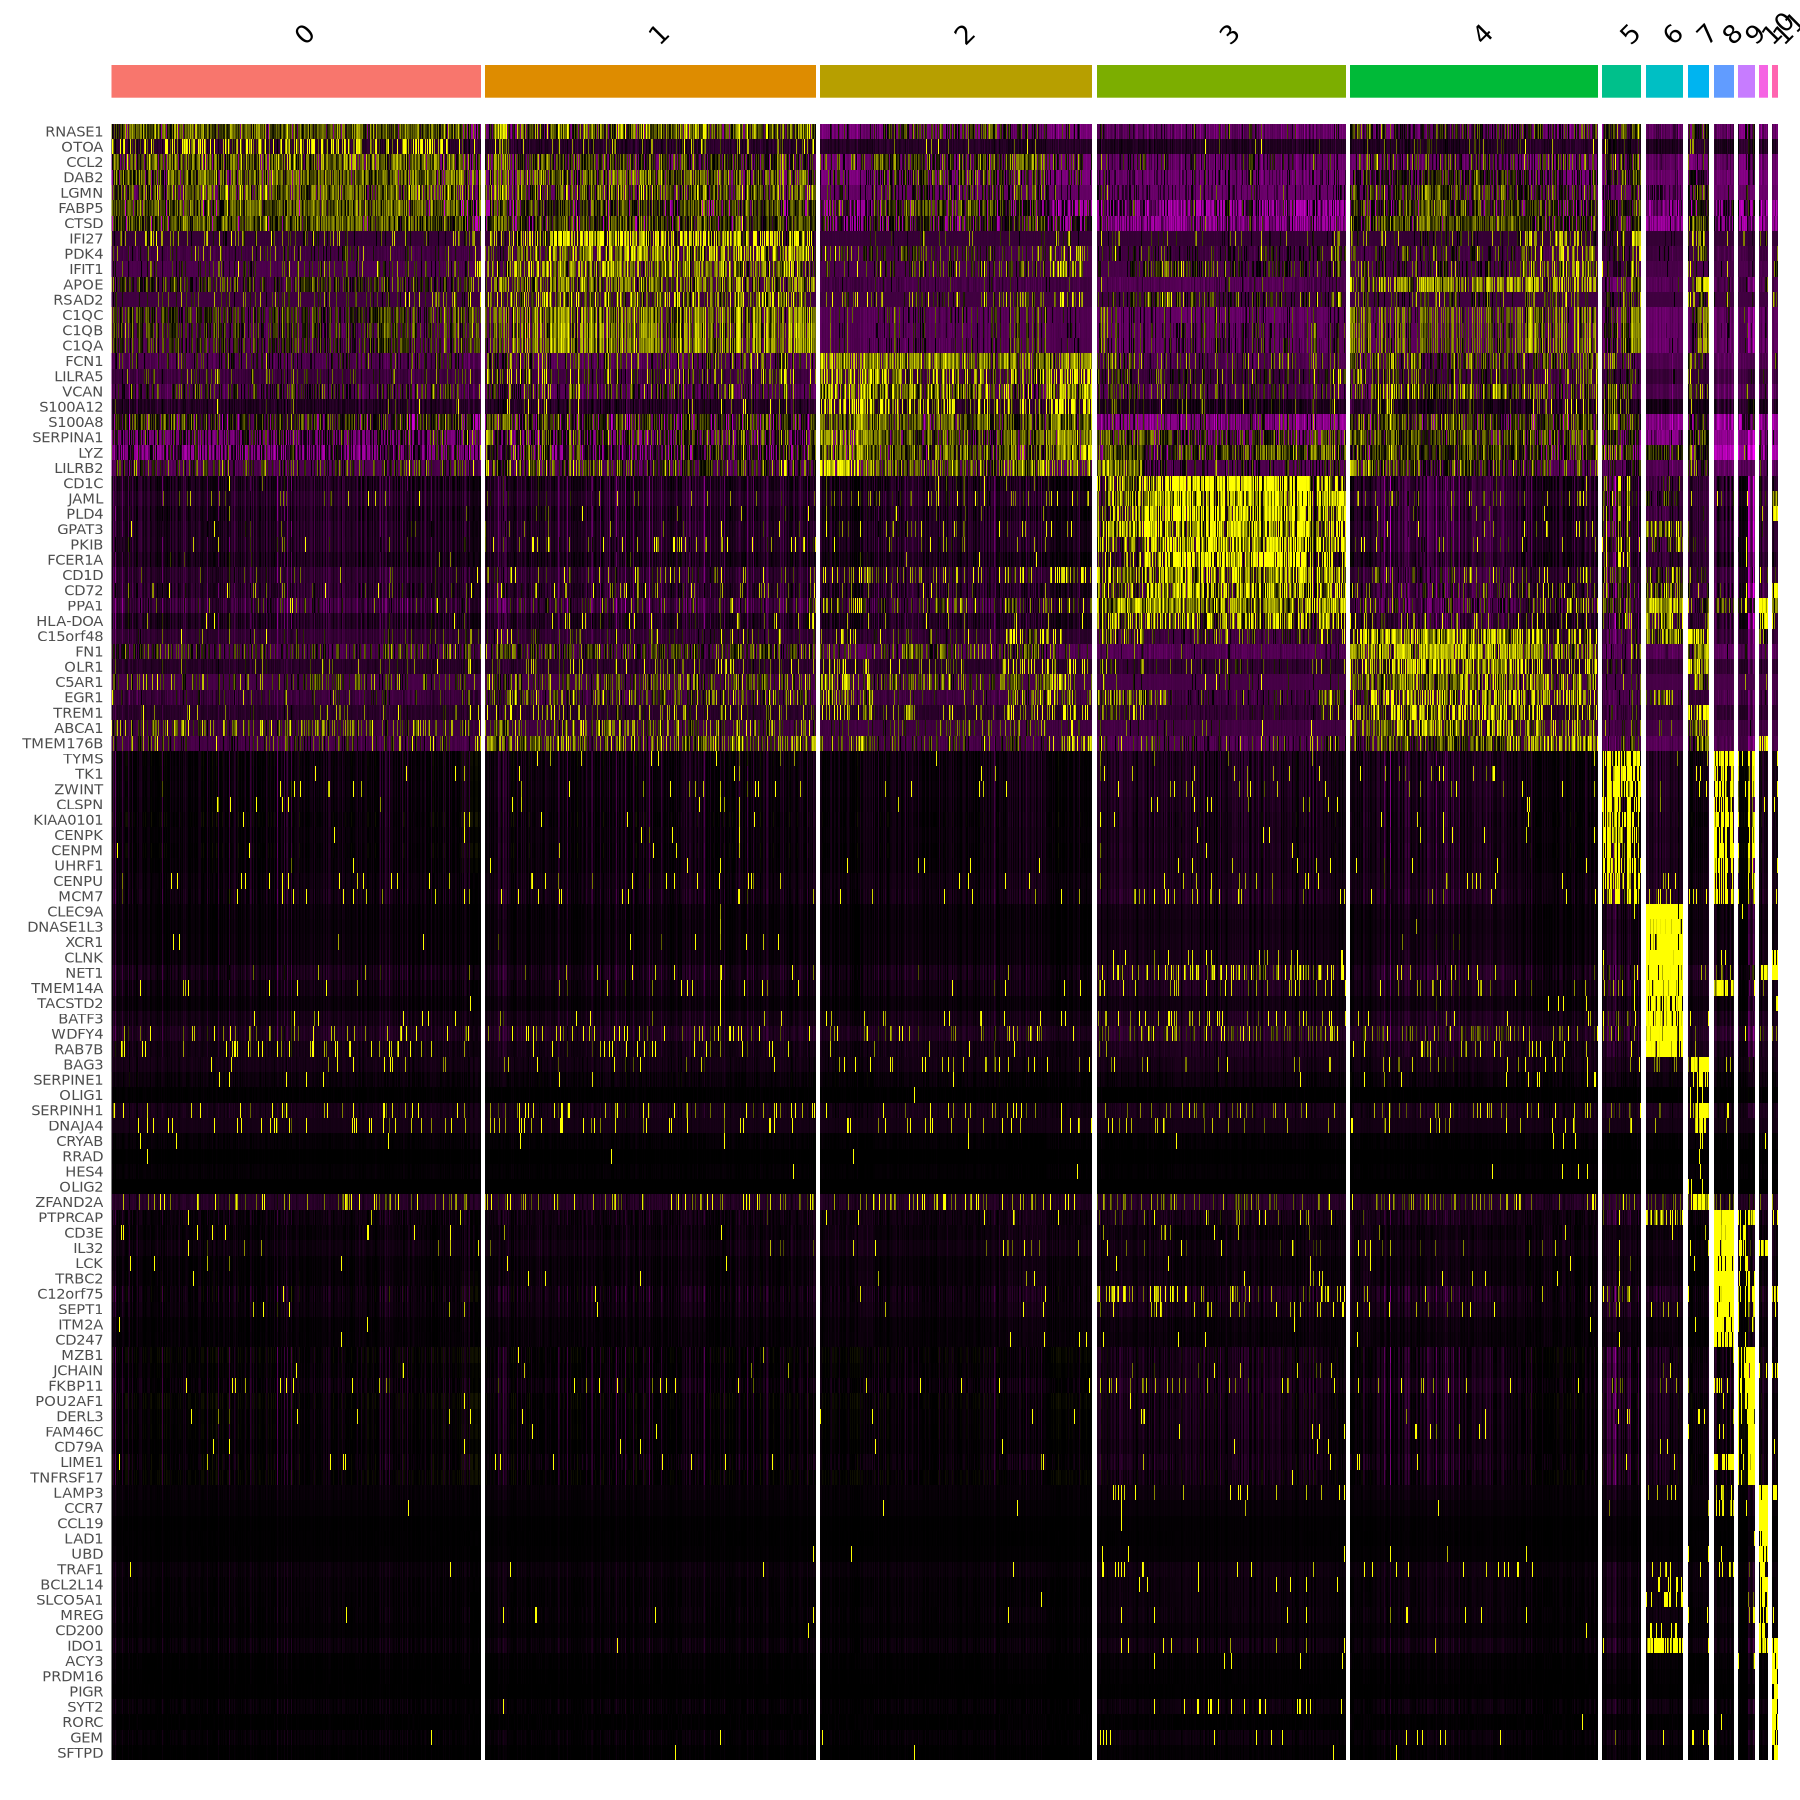

In [35]:
options(repr.plot.height=15, repr.plot.width=15)
myeloid_HGSOC_ascites.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10
DoHeatmap(myeloid_HGSOC_ascites, features = top10$gene) + NoLegend()

In [36]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(myeloid_HGSOC_ascites, file = "/scratch/user/s4436039/scdata/PRJCA005422/PRJCA005422_ascites_M_subcluster.RDS")

#### Next annotate cell clusters based on top 20 genes (done manually looking at csv exported above, see i drive for notes)

In [32]:
##add annotation code here

#### using seurat AddModuleScore to see where my mregDC signature is enriched

In [37]:
#calculate module score
myeloid_HGSOC_ascites <- AddModuleScore(
  object = myeloid_HGSOC_ascites,
  features = sig,
  name = "Sig_enriched"
)

Warning message:
“The following features are not present in the object: WFDC21P, AC073508.3, CYRIA, AL390719.1, EPOP, not searching for symbol synonyms”


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


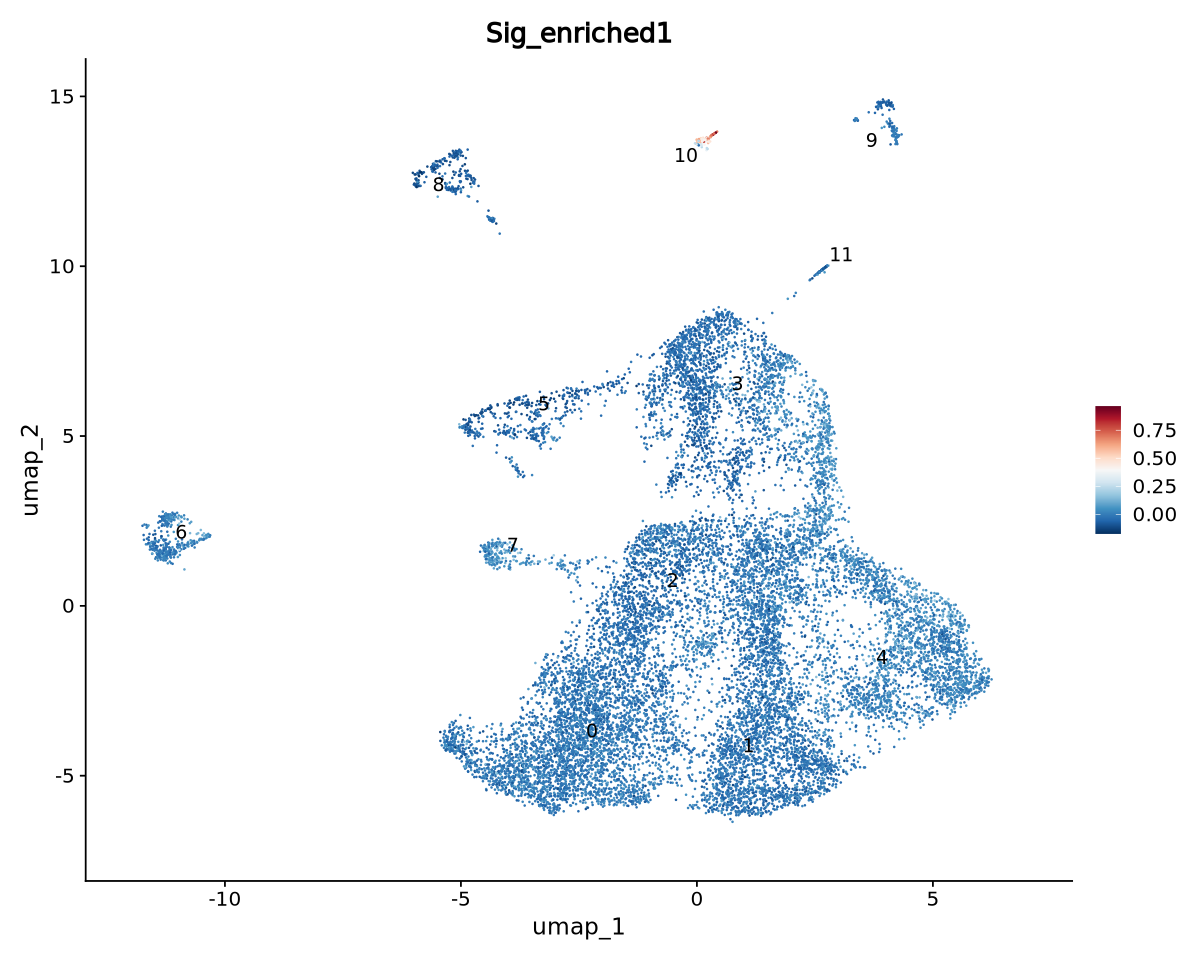

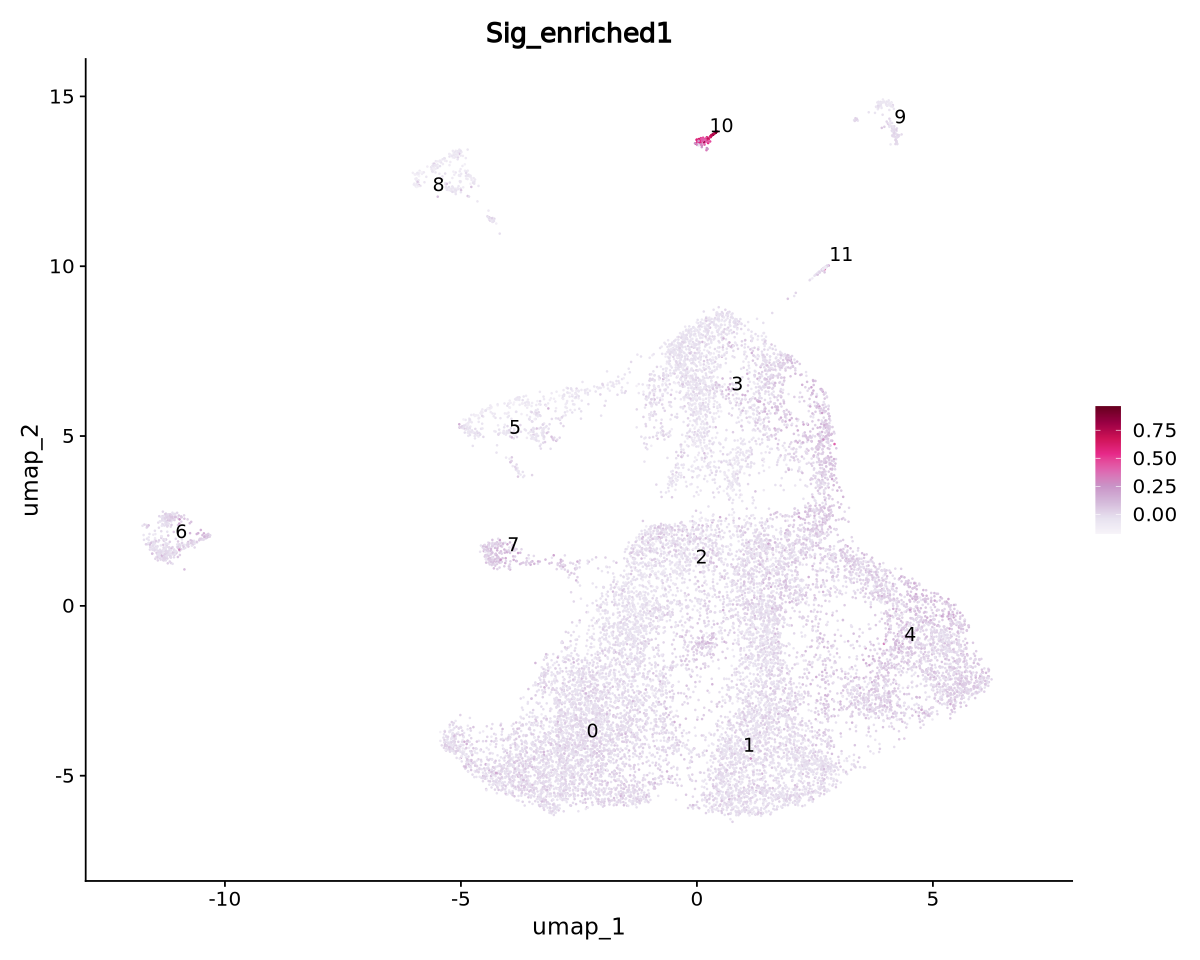

In [38]:
#Plot UMAP with module score
options(repr.plot.height=8, repr.plot.width=10)

FeaturePlot(myeloid_HGSOC_ascites,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu")))

FeaturePlot(myeloid_HGSOC_ascites,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = brewer.pal(n = 9, name = "PuRd"))